In [2]:
import os
from glob import glob
import matplotlib.pyplot as plt
import cv2

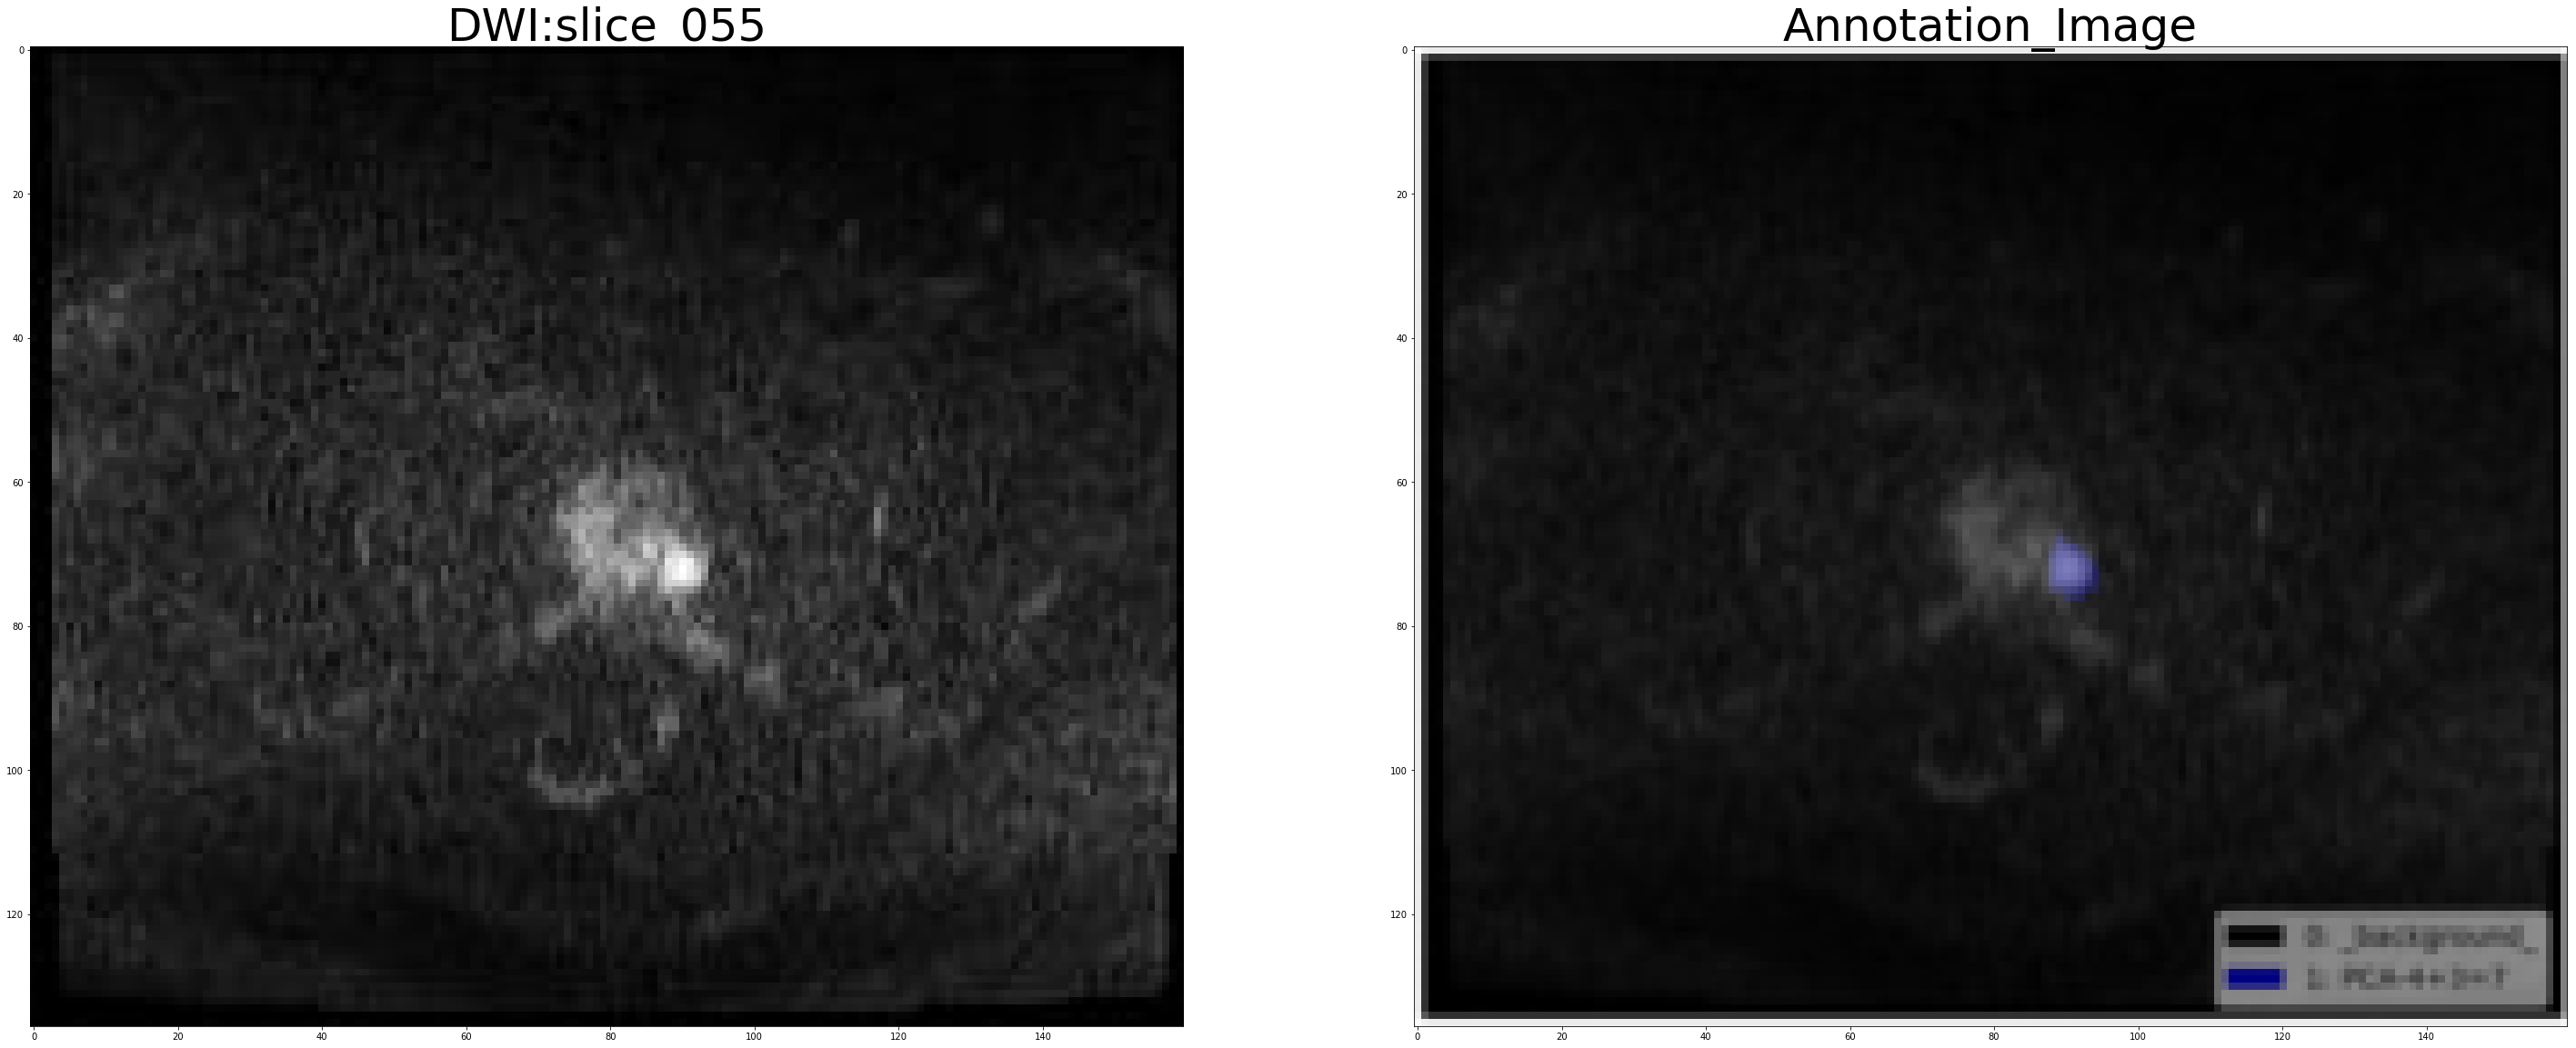

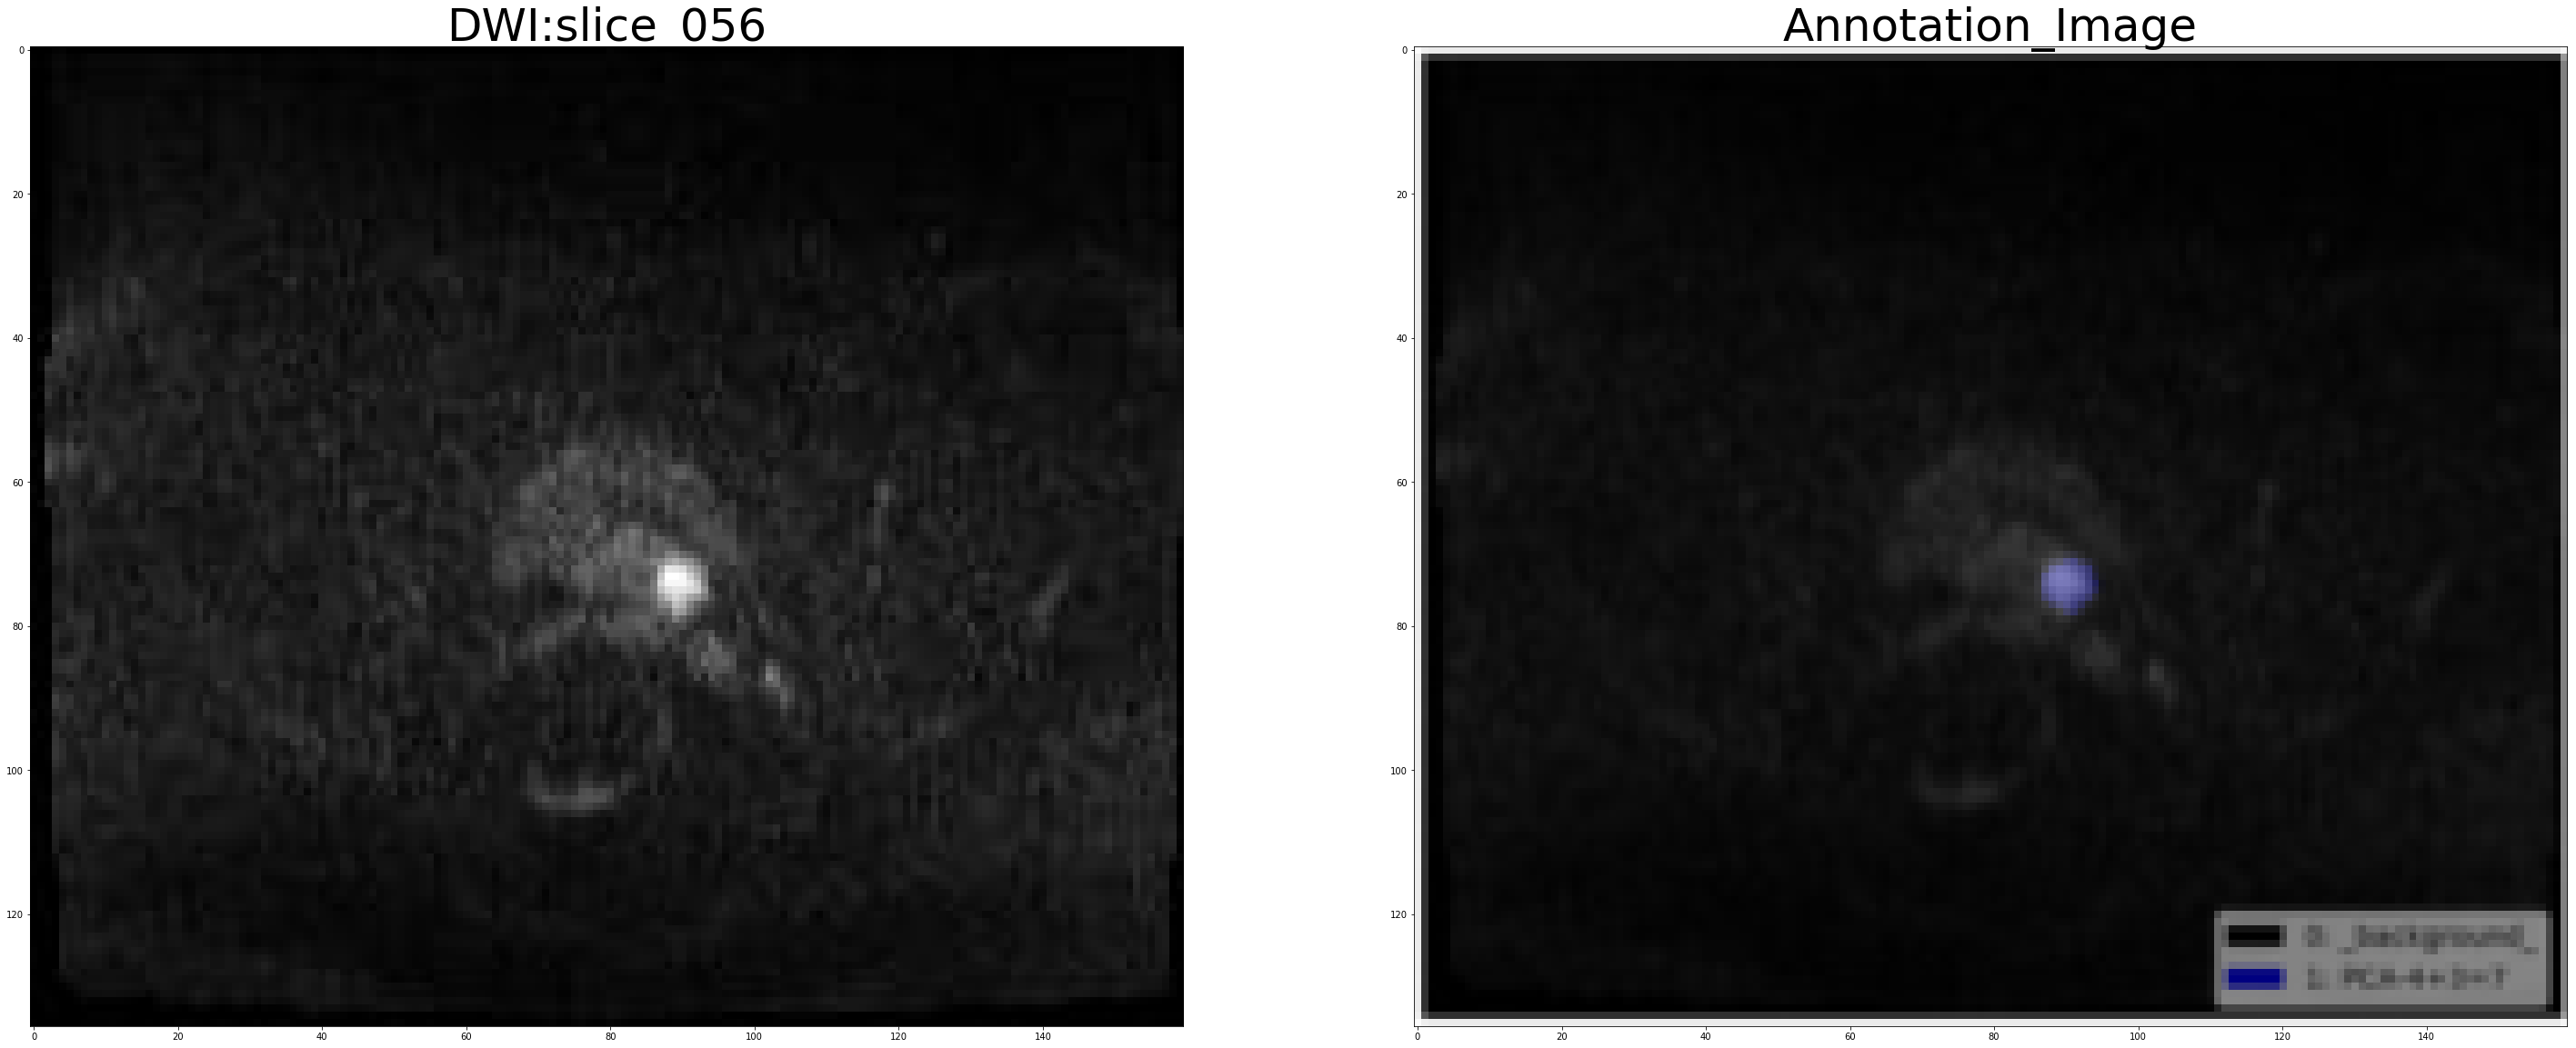

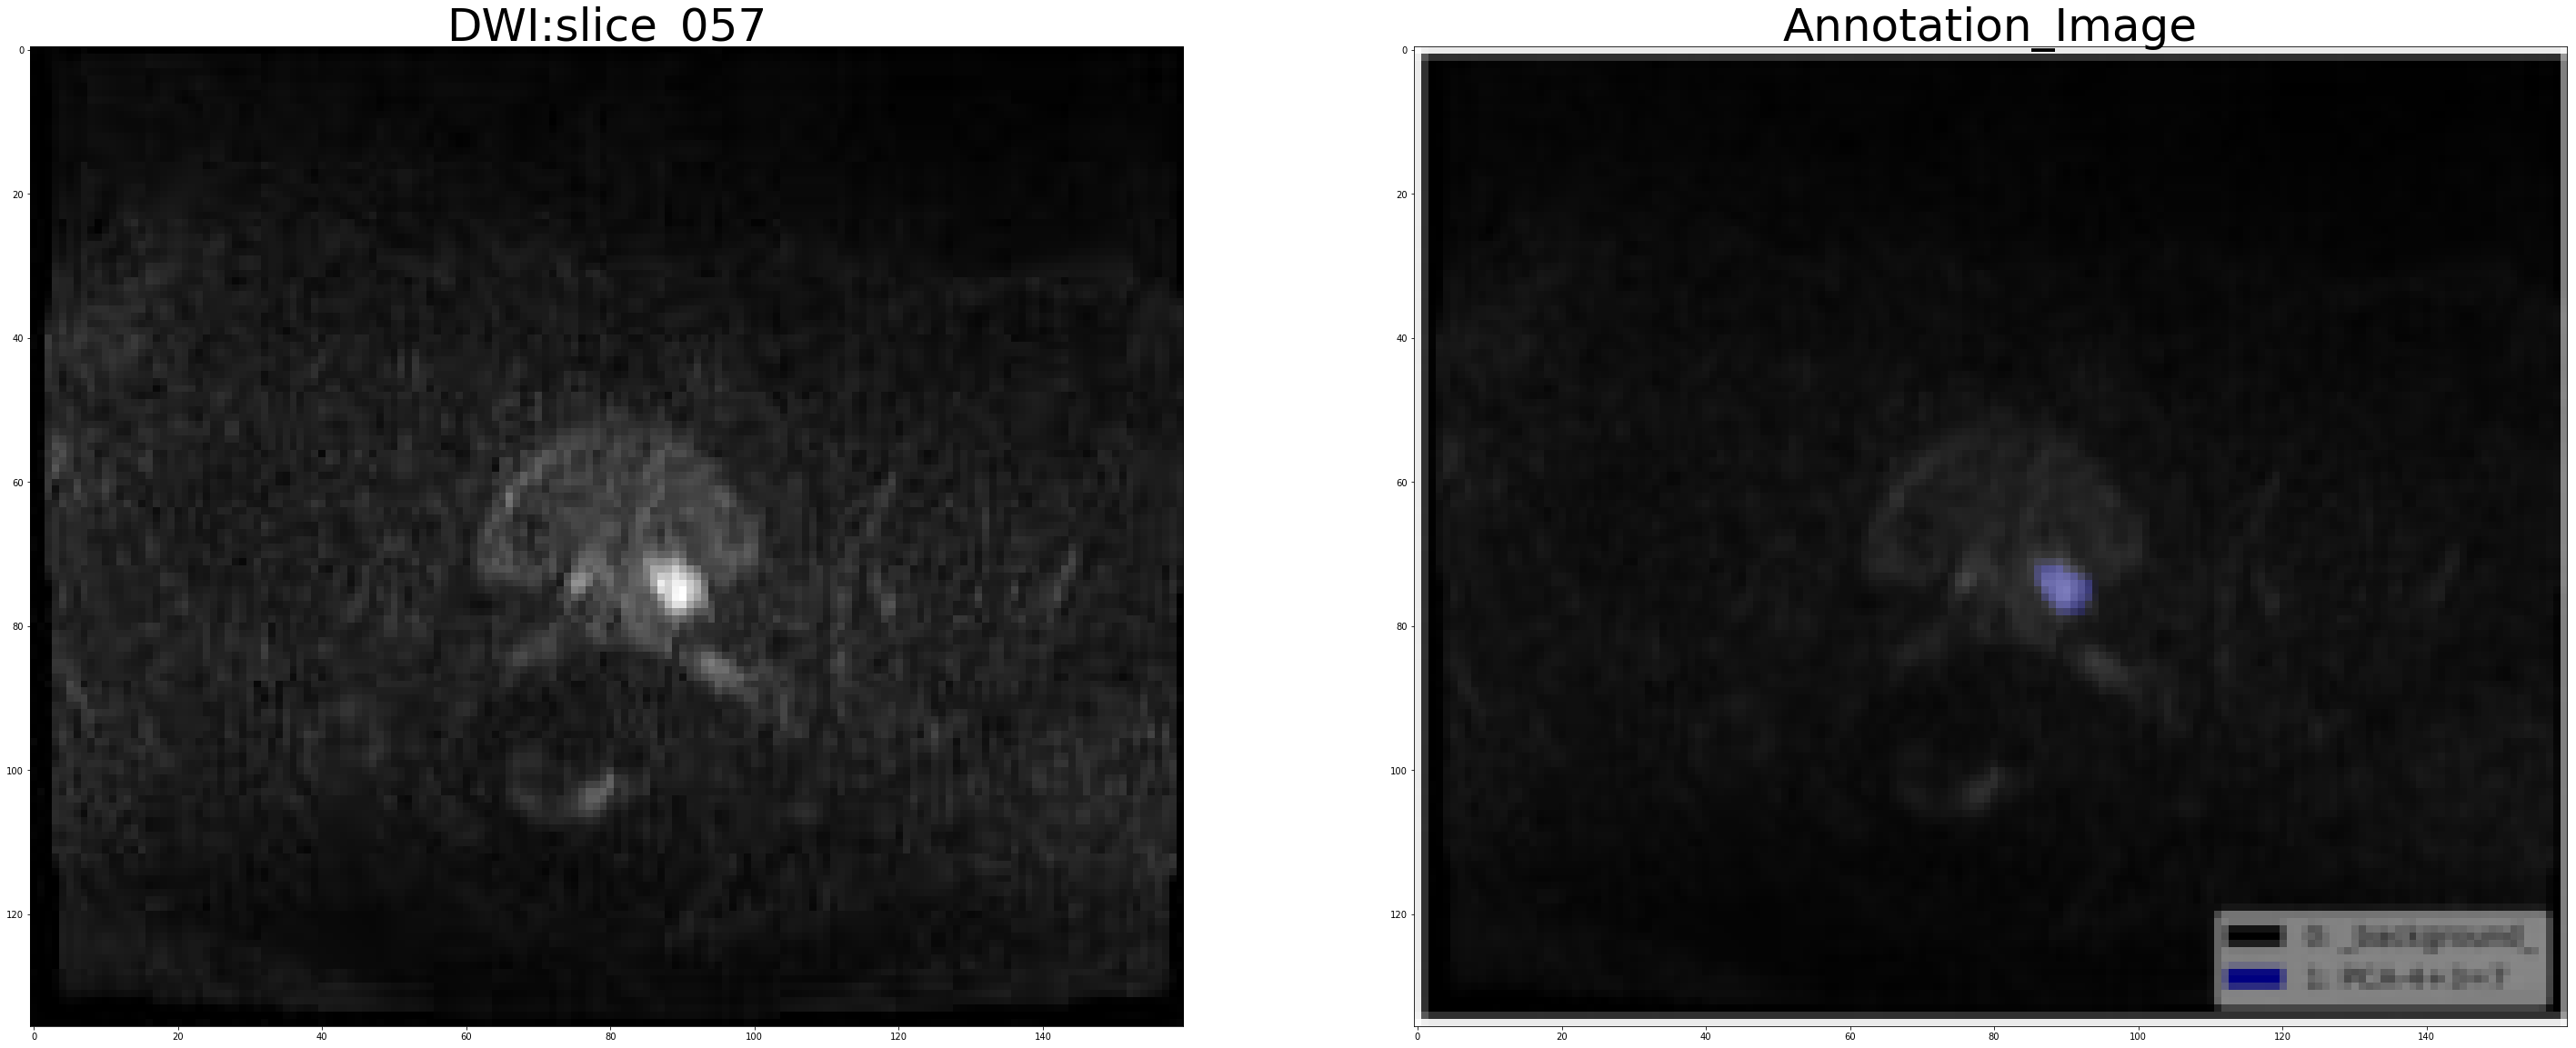

********************************************************************************************************************************************


In [4]:
# DIRCTORY  CATEGORY:
#     --Validate_Annotation.py
#     --20181218_10_biaozhun  (Dirctory)
#       --Patient_1
#         --Image
#         --Mask

anno_files=glob('../20181218_10_biaozhun/*')
# print (anno_files)
# patient_name=os.listdir('../20181218_10_biaozhun/')
# patient_name

series='DWI'



for i,anno_file in enumerate(anno_files[:1]):
#     print (anno_file+'/Mask/'+series+'/*')

    json_files=glob(anno_file+'/Mask/'+series+'/*/*')
    
    if len(json_files)>0:
        patient_name=json_files[0].split('/')[1].split('\\')[-1]
#         print ('%d.Patient Name: %s'%(i+1,patient_name))

        for json_file in json_files:
            slice=json_file.split('/')[-1].split('\\')[-1][:-5]
            f,ax=plt.subplots(1,2,figsize=(50,100))
            os.system('labelme_json_to_dataset '+json_file+' -o anno')
            original_img=cv2.imread('./anno/img.png')
            anno_img=cv2.imread('./anno/label_viz.png')
            ax[0].imshow(original_img)
            ax[0].set_title(series+':'+slice, fontsize=50)
            ax[1].imshow(anno_img)
            ax[1].set_title('Annotation_Image', fontsize=50)

            plt.show()
    else:
        patient_no_name=anno_file.split('\\')[-1]
        print ('%d.Patient 【%s】 no annotation...'%(i+1,patient_no_name))
    print ('********************************************************************************************************************************************')
        
    
